# Tutorial tensorflow (parte 1)
## Diseñado para la versión 2.3

In [9]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Model

print(tf.__version__)

2.4.1


## Tensorflow y Numpy son los mejores amigos <3

In [10]:
np_array = np.linspace(0, 1, 15).reshape(3, 5)
print(np_array)

[[0.         0.07142857 0.14285714 0.21428571 0.28571429]
 [0.35714286 0.42857143 0.5        0.57142857 0.64285714]
 [0.71428571 0.78571429 0.85714286 0.92857143 1.        ]]


In [11]:
tf.multiply(2.0, np_array)

<tf.Tensor: shape=(3, 5), dtype=float32, numpy=
array([[0.        , 0.14285715, 0.2857143 , 0.42857143, 0.5714286 ],
       [0.71428573, 0.85714287, 1.        , 1.1428572 , 1.2857143 ],
       [1.4285715 , 1.5714285 , 1.7142857 , 1.8571428 , 2.        ]],
      dtype=float32)>

### En muchas maneras TF2 actúa como Numpy en esteroides

## Construyamos un modelo paramétrico, es decir, algo que toma una entrada, arroja una salida y tiene parámetros que persisten en el tiempo.

In [12]:
class LinearModel(Model):
    def __init__(self, m=1, n=0):
        super(LinearModel, self).__init__()
        self.m = tf.Variable(m, dtype=tf.float32)
        self.n = tf.Variable(n, dtype=tf.float32)
        self.parameters = [self.m, self.n]
        
    def call(self, x):
        y = tf.cast(x, dtype=tf.float32)*self.m + self.n
        return y

In [13]:
my_linear_model = LinearModel(2, 3)

In [14]:
my_linear_model(3)

<tf.Tensor: shape=(), dtype=float32, numpy=9.0>

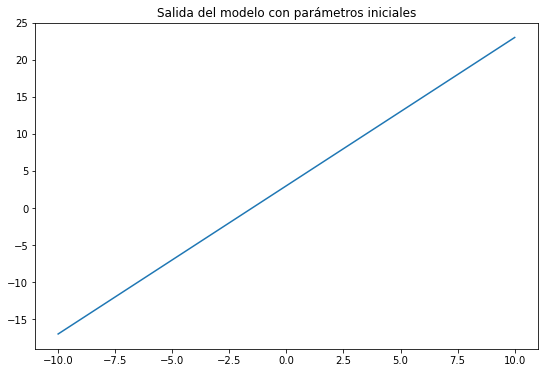

In [15]:
x = np.linspace(-10, 10, 1000, dtype=np.float32)
y = my_linear_model(x)

plt.figure(figsize=(9, 6))
plt.plot(x, y)
plt.title('Salida del modelo con parámetros iniciales')
plt.gcf().patch.set_facecolor('white')

## La mayoría de los algoritmos en machine learning hoy por hoy consisten en ajustar los parámetros de un modelo para minimizar una función de error.

## Si puedes derivar el error con respecto a los parámetros del modelo (i.e. calcular el gradiente del error), basta usar un algoritmo de optimización de primer orden y listo! 

![Grafo_1](grafo_1.png)

![Grafo_2](grafo_2.png)

In [16]:
@tf.function
def mse_error(prediction, target):
    return tf.reduce_mean((prediction - target)**2)

In [17]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.0)

In [18]:
@tf.function
def train_step(xs, targets):
    with tf.GradientTape() as tape:
        predictions = my_linear_model(xs)
        error = mse_error(predictions, targets)
    gradients = tape.gradient(error, my_linear_model.parameters)
    print(gradients)
    optimizer.apply_gradients(zip(gradients, my_linear_model.parameters))

### Necesitamos un conjunto de entrenamiento para que el modelo aprenda.

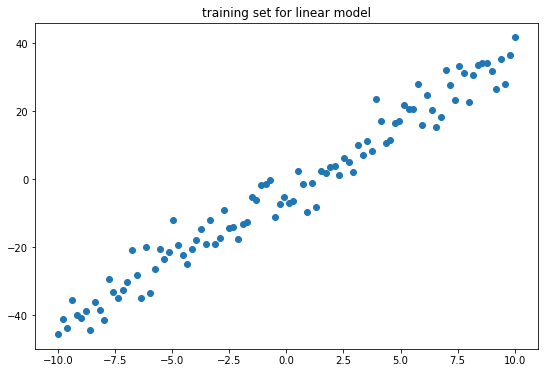

In [23]:
train_x = np.linspace(-10, 10, 100, dtype=np.float32)
true_m = 4.0
true_n = -3.0
train_y = train_x * true_m + true_n + np.random.randn(100)*4
train_y = train_y.astype(np.float32)

plt.figure(figsize=(9, 6))
plt.scatter(train_x, train_y)
plt.title('training set for linear model')
plt.gcf().patch.set_facecolor('white')

## A entrenar el modelo!

In [24]:
iteration_log = []
error_log = []
for epoch in range(100):
    if epoch % 10 == 0:
        print('epoch', epoch)
    train_step(train_x, train_y)
    train_error = mse_error(my_linear_model(train_x), train_y)
    iteration_log.append(epoch)
    error_log.append(train_error)

epoch 0
epoch 10
epoch 20
epoch 30
epoch 40
epoch 50
epoch 60
epoch 70
epoch 80
epoch 90


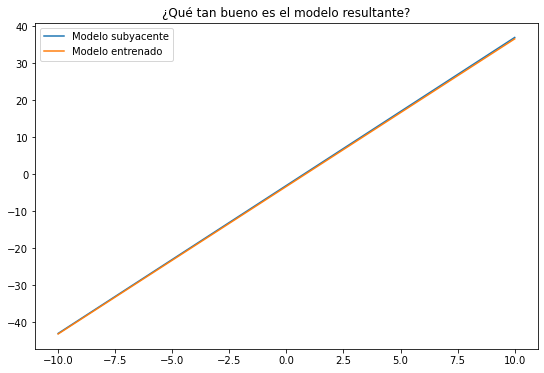

In [25]:
x_grid = np.linspace(-10, 10, 1000)
model_output = my_linear_model(x_grid)
underlying_model = x_grid*true_m + true_n

plt.figure(figsize=(9, 6))
plt.plot(x_grid, underlying_model, label='Modelo subyacente')
plt.plot(x_grid, model_output, label='Modelo entrenado')
plt.title('¿Qué tan bueno es el modelo resultante?')
plt.legend()
plt.gcf().patch.set_facecolor('white')

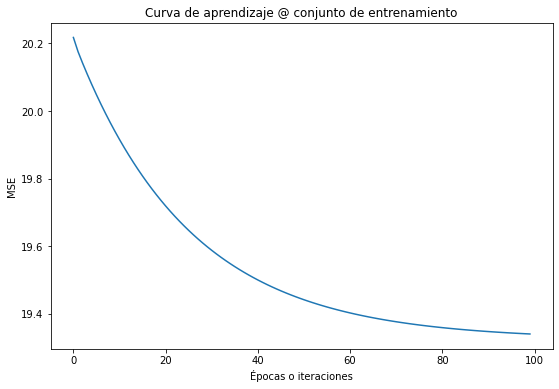

In [26]:
plt.figure(figsize=(9, 6))
plt.plot(iteration_log, error_log)
plt.xlabel('Épocas o iteraciones')
plt.ylabel('MSE')
plt.title('Curva de aprendizaje @ conjunto de entrenamiento')
plt.gcf().patch.set_facecolor('white')

## ¿Qué cosas hicimos hoy con tensorflow?
* Evaluar expresiones matemáticas.
* Crear un modelo personalizado heredando desde tf.keras.Model
* Evaluar un modelo.
* Crear una función de costo personalizada con @tf.function
* Usar un optimizador.
* Crear un *train step* usando tf.GradientTape para calcular gradientes.
* Aplicar un ciclo de entrenamiento.